In [20]:
#Automating Crypto Website API Pull Using Python
    # Automating the Data Pull
    # Automatic Pull into CSV
    # Transforming Data
    # Visualizing Data

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '2bfcacb7-8cf9-4269-8685-313fe6efdccc',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-03-05T04:14:08.602Z', 'error_code': 0, 'error_message': None, 'elapsed': 316, 'credit_count': 1, 'notice': None, 'total_count': 10791}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11968, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'pa

In [3]:
type(data)

dict

In [5]:
import pandas as pd

In [7]:
#This allow to see all the columns not just 15 columns 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [9]:
#This Normalize the data to see pretty in Dataframe
df = pd.json_normalize(data['data'])
#Adding datetime formate in data set columns 
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11968,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.983239e+07,1.983239e+07,False,NaN,1,NaN,NaN,None,2025-03-05T04:12:00.000Z,87109.274254,6.054078e+10,-20.0571,-0.519518,4.016888,-1.909008,-7.235233,-11.036437,-15.679576,1.727585e+12,60.3538,1.829295e+12,None,2025-03-05T04:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 09:44:21.868308
1,1027,Ethereum,ETH,ethereum,9960,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205925e+08,1.205925e+08,True,NaN,2,NaN,NaN,None,2025-03-05T04:12:00.000Z,2166.587184,2.979044e+10,-16.3711,-0.753374,4.038949,-12.895487,-13.736311,-39.629330,-43.923178,2.612741e+11,9.1277,2.612741e+11,None,2025-03-05T04:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 09:44:21.868308
2,825,Tether USDt,USDT,tether,118301,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.424954e+11,1.445616e+11,True,NaN,3,NaN,NaN,None,2025-03-05T04:12:00.000Z,0.999729,1.149471e+11,-20.6469,0.004464,0.024076,0.092815,-0.084350,0.008324,-0.106388,1.424567e+11,4.9768,1.445224e+11,None,2025-03-05T04:12:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-05 09:44:21.868308
3,52,XRP,XRP,xrp,1545,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.794974e+10,9.998639e+10,False,NaN,4,NaN,NaN,None,2025-03-05T04:12:00.000Z,2.455525,1.005237e+10,-29.6874,-2.173939,6.860106,6.235463,9.476414,-0.051731,7.963802,1.422970e+11,4.9712,2.455525e+11,None,2025-03-05T04:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 09:44:21.868308
4,1839,BNB,BNB,bnb,2382,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424757e+08,1.424757e+08,False,NaN,5,NaN,NaN,None,2025-03-05T04:12:00.000Z,587.954402,1.777153e+09,-19.7475,-0.244512,5.076157,-6.503642,6.325653,-18.186666,-18.339573,8.376924e+10,2.9308,8.376924e+10,None,2025-03-05T04:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 09:44:21.868308
5,5426,Solana,SOL,solana,847,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.079428e+08,5.954367e+08,True,NaN,6,NaN,NaN,None,2025-03-05T04:12:00.000Z,142.183705,6.931493e+09,-26.5695,-1.816831,4.536369,-0.978130,-28.023265,-34.156263,-39.630617,7.222119e+10,2.5231,8.466139e+10,None,2025-03-05T04:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 09:44:21.868308
6,3408,USDC,USDC,usd-coin,26051,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.662375e+10,5.662375e+10,False,NaN,7,NaN,NaN,None,2025-03-05T04:12:00.000Z,1.000148,1.319087e+10,-7.3751,0.019142,0.025471,0.019613,0.013737,0.026604,0.019367,5.663216e+10,1.9785,5.663216e+10,None,2025-03-05T04:12:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-05 09:44:21.868308
7,2010,Cardano,ADA,cardano,1470,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.521242e+10,4.499494e+10,False,NaN,8,NaN,NaN,None,2025-03-05T04:12:00.000Z,0.936429,5.183567e+09,-19.0802,-2.934090,17.571622,35.842387,42.702633,-14.336317,-21.138877,3.297394e+10,1.1520,4.213931e+10,None,2025-03-05T04:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 09:44:21.868308
8,74,Dogecoin,DOGE,dogecoin,1173,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange

In [11]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '2bfcacb7-8cf9-4269-8685-313fe6efdccc',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df 

    if not os.path.isfile(r'C:\Users\tikes\Downloads\API.csv'):
        df.to_csv(r'C:\Users\tikes\Downloads\API.csv', header = 'Column_name')
    else:
        df.to_csv(r'C:\Users\tikes\Downloads\API.csv', mode = 'a', header = False)
        

In [15]:
import os
from time import time 
from time import sleep

for i in range(150):
    api_runner()
    print('API Runner Completed!')
    sleep(60)  #Sleep for 1 minute
exit()

{'status': {'timestamp': '2025-03-05T04:15:58.944Z', 'error_code': 0, 'error_message': None, 'elapsed': 25, 'credit_count': 1, 'notice': None, 'total_count': 10791}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11968, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

KeyboardInterrupt: 

In [18]:
df7 = pd.read_csv(r'C:\Users\tikes\Downloads\API.csv')
df7

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11968,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.983224e+07,1.983224e+07,False,NaN,1,NaN,NaN,NaN,2025-03-04T20:07:00.000Z,88122.702113,7.034017e+10,1.9965,0.816187,2.654734,0.215569,-10.408559,-10.510606,-9.915335,1.747671e+12,60.6205,1.850577e+12,NaN,2025-03-04T20:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 01:38:35.838280
1,1,1027,Ethereum,ETH,ethereum,9960,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.205901e+08,1.205901e+08,True,NaN,2,NaN,NaN,NaN,2025-03-04T20:07:00.000Z,2173.237402,3.573213e+10,13.5858,0.737644,1.912227,-11.864777,-26.921117,-39.884745,-43.626939,2.620709e+11,9.0903,2.620709e+11,NaN,2025-03-04T20:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 01:38:35.838280
2,2,52,XRP,XRP,xrp,1545,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.794974e+10,9.998639e+10,False,NaN,3,NaN,NaN,NaN,2025-03-04T20:08:00.000Z,2.494358,1.230454e+10,-15.6461,-0.408840,4.766022,10.417050,-7.080722,1.317091,4.553710,1.445474e+11,5.0138,2.494358e+11,NaN,2025-03-04T20:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 01:38:35.838280
3,3,825,Tether USDt,USDT,tether,118287,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,1.425087e+11,1.445616e+11,True,NaN,4,NaN,NaN,NaN,2025-03-04T20:07:00.000Z,0.999781,1.358939e+11,-0.1890,-0.007054,0.006728,0.130715,0.047876,-0.008875,-0.172427,1.424775e+11,4.9420,1.445299e+11,NaN,2025-03-04T20:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-05 01:38:35.838280
4,4,1839,BNB,BNB,bnb,2382,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.424758e+08,1.424758e+08,False,NaN,5,NaN,NaN,NaN,2025-03-04T20:08:00.000Z,583.436522,2.044949e+09,-6.0836,0.326667,1.651807,-5.793077,-6.934750,-17.916151,-21.255178,8.312556e+10,2.8753,8.312556e+10,NaN,2025-03-04T20:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 01:38:35.838280
5,5,5426,Solana,SOL,solana,847,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.078973e+08,5.954370e+08,True,NaN,6,NaN,NaN,NaN,2025-03-04T20:07:00.000Z,143.250209,8.275229e+09,-14.0087,0.340933,0.501468,-0.700550,-29.871287,-33.740050,-38.455356,7.275639e+10,2.5237,8.529648e+10,NaN,2025-03-04T20:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 01:38:35.838280
6,6,3408,USDC,USDC,usd-coin,26048,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,5.637524e+10,5.637524e+10,False,NaN,7,NaN,NaN,NaN,2025-03-04T20:07:00.000Z,0.999906,1.419592e+10,6.9383,-0.015296,-0.021688,-0.003436,0.041271,-0.021068,0.003703,5.636993e+10,1.9553,5.636993e+10,NaN,2025-03-04T20:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-05 01:38:35.838280
7,7,2010,Cardano,ADA,cardano,1470,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.521242e+10,4.499494e+10,False,NaN,8,NaN,NaN,NaN,2025-03-04T20:08:00.000Z,0.932403,5.435897e+09,-29.6994,-0.673097,8.868643,38.643798,13.624195,-14.797167,-21.847234,3.283216e+10,1.1388,4.195812e+10,NaN,2025-03-04T20:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 01:38:35.838280
8,8,74,Dogecoin,DOGE,dogecoin,1173,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'med

In [24]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11968,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.983239e+07,1.983239e+07,False,NaN,1,NaN,NaN,None,2025-03-05T04:15:00.000Z,87033.107687,5.992387e+10,-21.7115,-0.760055,3.890693,-2.042533,-7.452879,-11.125944,-15.563116,1.726074e+12,60.2773,1.827695e+12,None,2025-03-05T04:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 09:45:59.138436
1,1027,Ethereum,ETH,ethereum,9960,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205925e+08,1.205925e+08,True,NaN,2,NaN,NaN,None,2025-03-05T04:14:00.000Z,2165.017824,2.880695e+10,-20.2610,-1.042123,4.054696,-12.960942,-13.855491,-39.685518,-44.083201,2.610848e+11,9.1211,2.610848e+11,None,2025-03-05T04:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 09:45:59.138436
2,825,Tether USDt,USDT,tether,118301,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.424954e+11,1.445616e+11,True,NaN,3,NaN,NaN,None,2025-03-05T04:14:00.000Z,0.999667,1.150101e+11,-20.9591,-0.009169,0.014291,0.092411,-0.116634,-0.001212,-0.108073,1.424479e+11,4.9745,1.445135e+11,None,2025-03-05T04:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-05 09:45:59.138436
3,52,XRP,XRP,xrp,1545,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.794974e+10,9.998639e+10,False,NaN,4,NaN,NaN,None,2025-03-05T04:15:00.000Z,2.451064,1.006389e+10,-29.6375,-2.427693,6.529204,6.104469,9.964206,-0.337077,7.513798,1.420385e+11,4.9622,2.451064e+11,None,2025-03-05T04:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 09:45:59.138436
4,1839,BNB,BNB,bnb,2382,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424757e+08,1.424757e+08,False,NaN,5,NaN,NaN,None,2025-03-05T04:15:00.000Z,588.270129,1.776392e+09,-19.8332,-0.227794,5.045970,-6.435862,6.618917,-18.134638,-18.569610,8.381422e+10,2.9274,8.381422e+10,None,2025-03-05T04:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 09:45:59.138436
5,5426,Solana,SOL,solana,847,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.079428e+08,5.954367e+08,True,NaN,6,NaN,NaN,None,2025-03-05T04:15:00.000Z,142.112586,6.935959e+09,-26.5378,-2.033900,4.439187,-0.956886,-27.772610,-34.189965,-39.723154,7.218507e+10,2.5218,8.461904e+10,None,2025-03-05T04:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 09:45:59.138436
6,3408,USDC,USDC,usd-coin,26051,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.662375e+10,5.662375e+10,False,NaN,7,NaN,NaN,None,2025-03-05T04:15:00.000Z,0.999918,1.251110e+10,-14.9316,-0.005872,-0.004116,0.005619,-0.040783,0.000186,0.006195,5.661909e+10,1.9780,5.661909e+10,None,2025-03-05T04:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-05 09:45:59.138436
7,2010,Cardano,ADA,cardano,1470,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.521242e+10,4.499494e+10,False,NaN,8,NaN,NaN,None,2025-03-05T04:15:00.000Z,0.936508,5.186381e+09,-19.0270,-2.996353,17.643361,35.975889,43.309423,-14.407210,-21.276772,3.297673e+10,1.1521,4.214288e+10,None,2025-03-05T04:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 09:45:59.138436
8,74,Dogecoin,DOGE,dogecoin,1173,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-ex

In [26]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [28]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11968,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19832387.00000,19832387.00000,False,NaN,1,NaN,NaN,None,2025-03-05T04:15:00.000Z,87033.10769,59923868287.72558,-21.71150,-0.76006,3.89069,-2.04253,-7.45288,-11.12594,-15.56312,1726074273451.80591,60.27730,1827695261416.98999,None,2025-03-05T04:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 09:45:59.138436
1,1027,Ethereum,ETH,ethereum,9960,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120592467.44609,120592467.44609,True,NaN,2,NaN,NaN,None,2025-03-05T04:14:00.000Z,2165.01782,28806949736.81871,-20.26100,-1.04212,4.05470,-12.96094,-13.85549,-39.68552,-44.08320,261084841486.04132,9.12110,261084841486.04001,None,2025-03-05T04:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 09:45:59.138436
2,825,Tether USDt,USDT,tether,118301,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,142495395118.64359,144561615222.92096,True,NaN,3,NaN,NaN,None,2025-03-05T04:14:00.000Z,0.99967,115010068892.51257,-20.95910,-0.00917,0.01429,0.09241,-0.11663,-0.00121,-0.10807,142447923651.72833,4.97450,144513455407.45001,None,2025-03-05T04:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-05 09:45:59.138436
3,52,XRP,XRP,xrp,1545,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,57949738512.00000,99986390660.00000,False,NaN,4,NaN,NaN,None,2025-03-05T04:15:00.000Z,2.45106,10063892400.33154,-29.63750,-2.42769,6.52920,6.10447,9.96421,-0.33708,7.51380,142038535330.42810,4.96220,245106430119.64001,None,2025-03-05T04:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 09:45:59.138436
4,1839,BNB,BNB,bnb,2382,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142475736.69000,142475736.69000,False,NaN,5,NaN,NaN,None,2025-03-05T04:15:00.000Z,588.27013,1776392201.97695,-19.83320,-0.22779,5.04597,-6.43586,6.61892,-18.13464,-18.56961,83814220025.98761,2.92740,83814220025.99001,None,2025-03-05T04:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 09:45:59.138436
5,5426,Solana,SOL,solana,847,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,507942834.99426,595436663.00485,True,NaN,6,NaN,NaN,None,2025-03-05T04:15:00.000Z,142.11259,6935959092.76083,-26.53780,-2.03390,4.43919,-0.95689,-27.77261,-34.18997,-39.72315,72185070046.56668,2.52180,84619044243.00999,None,2025-03-05T04:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 09:45:59.138436
6,3408,USDC,USDC,usd-coin,26051,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,56623754216.71095,56623754216.71095,False,NaN,7,NaN,NaN,None,2025-03-05T04:15:00.000Z,0.99992,12511099197.69346,-14.93160,-0.00587,-0.00412,0.00562,-0.04078,0.00019,0.00620,56619088359.45899,1.97800,56619088359.46000,None,2025-03-05T04:15:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-05 09:45:59.138436
7,2010,Cardano,ADA,cardano,1470,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35212423444.40199,44994943014.63995,False,NaN,8,NaN,NaN,None,2025-03-05T04:15:00.000Z,0.93651,5186380675.11284,-19.02700,-2.99635,17.64336,35.97589,43.30942,-14.40721,-21.27677,32976733621.58477,1.15210,42142882193.68000

In [96]:
#Group by crypto names with flacuating of crypto values by diffrent percent changes 
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.76006,3.89069,-2.04253,-7.45288,-11.12594,-15.56312
Ethereum,-1.04212,4.05470,-12.96094,-13.85549,-39.68552,-44.08320
Tether USDt,-0.00917,0.01429,0.09241,-0.11663,-0.00121,-0.10807
XRP,-2.42769,6.52920,6.10447,9.96421,-0.33708,7.51380
BNB,-0.22779,5.04597,-6.43586,6.61892,-18.13464,-18.56961
Solana,-2.03390,4.43919,-0.95689,-27.77261,-34.18997,-39.72315
USDC,-0.00587,-0.00412,0.00562,-0.04078,0.00019,0.00620
Cardano,-2.99635,17.64336,35.97589,43.30942,-14.40721,-21.27677
Dogecoin,-1.42958,4.10390,-5.87970,-13.90642,-48.69798,-54.85496


In [98]:
#Stacking of the data in rows
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.76006
              quote.USD.percent_change_24h     3.89069
              quote.USD.percent_change_7d     -2.04253
              quote.USD.percent_change_30d    -7.45288
              quote.USD.percent_change_60d   -11.12594
              quote.USD.percent_change_90d   -15.56312
Ethereum      quote.USD.percent_change_1h     -1.04212
              quote.USD.percent_change_24h     4.05470
              quote.USD.percent_change_7d    -12.96094
              quote.USD.percent_change_30d   -13.85549
              quote.USD.percent_change_60d   -39.68552
              quote.USD.percent_change_90d   -44.08320
Tether USDt   quote.USD.percent_change_1h     -0.00917
              quote.USD.percent_change_24h     0.01429
              quote.USD.percent_change_7d      0.09241
              quote.USD.percent_change_30d    -0.11663
              quote.USD.percent_change_60d    -0.00121
              quote.US

In [100]:
#checking the data type of the df3 is DataFrame.
type(df3)

pandas.core.frame.DataFrame

In [102]:
#After stacked of the df3 the data type no longer dataFrame it converted to series.
type(df4)

pandas.core.series.Series

In [104]:
#we no longer using series so convert back to DataFrame
df5 = df4.to_frame(name = 'Values')
df5

Values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.76006
             quote.USD.percent_change_24h   3.89069
             quote.USD.percent_change_7d   -2.04253
             quote.USD.percent_change_30d  -7.45288
             quote.USD.percent_change_60d -11.12594
             quote.USD.percent_change_90d -15.56312
Ethereum     quote.USD.percent_change_1h   -1.04212
             quote.USD.percent_change_24h   4.05470
             quote.USD.percent_change_7d  -12.96094
             quote.USD.percent_change_30d -13.85549
             quote.USD.percent_change_60d -39.68552
             quote.USD.percent_change_90d -44.08320
Tether USDt  quote.USD.percent_change_1h   -0.00917
             quote.USD.percent_change_24h   0.01429
             quote.USD.percent_change_7d    0.09241
             quote.USD.percent_change_30d  -0.11663
             quote.USD.percent_change_60d  -0.00121
             quote.USD.percent_change_90d  -0.10807
XRP          quote.USD.percent_change_1h   -2.42769
             quote.USD.percent_change_24h   6.52920
             quote.USD.percent_change_7d    6.10447
             quote.USD.percent_change_30d   9.96421
             quote.USD.percent_change_60d  -0.33708
             quote.USD.percent_change_90d   7.51380
BNB          quote.USD.percent_change_1h   -0.22779
             quote.USD.percent_change_24h   5.04597
             quote.USD.percent_change_7d   -6.43586
             quote.USD.percent_change_30d   6.61892
             quote.USD.percent_change_60d -18.13464
             quote.USD.percent_change_90d -18.56961
Solana       quote.USD.percent_change_1h   -2.03390
             quote.USD.percent_change_24h   4.43919
             quote.USD.percent_change_7d   -0.95689
             quote.USD.percent_change_30d -27.77261
             quote.USD.percent_change_60d -34.18997
             quote.USD.percent_change_90d -39.72315
USDC         quote.USD.percent_change_1h   -0.00587
             quote.USD.percent_change_24h  -0.00412
             quote.USD.percent_change_7d    0.00562
             quote.USD.percent_change_30d  -0.04078
             quote.USD.percent_change_60d   0.00019
             quote.USD.percent_change_90d   0.00620
Cardano      quote.USD.percent_change_1h   -2.99635
             quote.USD.percent_change_24h  17.64336
             quote.USD.percent_change_7d   35.97589
             quote.USD.percent_change_30d  43.30942
             quote.USD.percent_change_60d -14.40721
             quote.USD.percent_change_90d -21.27677
Dogecoin     quote.USD.percent_change_1h   -1.42958
             quote.USD.percent_change_24h   4.10390
             quote.USD.percent_change_7d   -5.87970
             quote.USD.percent_change_30d -13.90642
             quote.USD.percent_change_60d -48.69798
             quote.USD.percent_change_90d -54.85496
TRON         quote.USD.percent_change_1h   -0.67029
             quote.USD.percent_change_24h   4.81805
             quote.USD.percent_change_7d    5.24964
             quote.USD.percent_change_30d  13.23545
             quote.USD.percent_change_60d  -9.43921
             quote.USD.percent_change_90d -24.18566
Pi           quote.USD.percent_change_1h    0.19648
             quote.USD.percent_change_24h   5.76472
             quote.USD.percent_change_7d    8.61452
             quote.USD.percent_change_30d   6.37215
             quote.USD.percent_change_60d   6.37215
             quote.USD.percent_change_90d   6.37215
Hedera       quote.USD.percent_change_1h   -2.44308
             quote.USD.percent_change_24h   8.99442
             quote.USD.percent_change_7d   24.71456
             quote.USD.percent_change_30d  12.31796
             quote.USD.percent_change_60d -20.57219
             quote.USD.percent_change_90d -15.84046
Chainlink    quote.USD.percent_change_1h   -0.43633
             quote.USD.percent_change_24h   8.32665
             quote.USD.percent_change_7d   -2.87110
             quote.USD.percent_change_30d

In [106]:
type(df5)

pandas.core.frame.DataFrame

In [108]:
#count of the values
df5.count()

Values    90
dtype: int64

In [110]:
#Don't want index as name change it to number 
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,Values
0,Bitcoin,quote.USD.percent_change_1h,-0.76006
1,Bitcoin,quote.USD.percent_change_24h,3.89069
2,Bitcoin,quote.USD.percent_change_7d,-2.04253
3,Bitcoin,quote.USD.percent_change_30d,-7.45288
4,Bitcoin,quote.USD.percent_change_60d,-11.12594
5,Bitcoin,quote.USD.percent_change_90d,-15.56312
6,Ethereum,quote.USD.percent_change_1h,-1.04212
7,Ethereum,quote.USD.percent_change_24h,4.05470
8,Ethereum,quote.USD.percent_change_7d,-12.96094
9,Ethereum,quote.USD.percent_change_30d,-13.85549


In [112]:
#Chenge column names level_1 to Percentage_change
df7 = df6.rename(columns = {'name':'Name','level_1':'Percentage_Change'})
df7

,Name,Percentage_Change,Values
0,Bitcoin,quote.USD.percent_change_1h,-0.76006
1,Bitcoin,quote.USD.percent_change_24h,3.89069
2,Bitcoin,quote.USD.percent_change_7d,-2.04253
3,Bitcoin,quote.USD.percent_change_30d,-7.45288
4,Bitcoin,quote.USD.percent_change_60d,-11.12594
5,Bitcoin,quote.USD.percent_change_90d,-15.56312
6,Ethereum,quote.USD.percent_change_1h,-1.04212
7,Ethereum,quote.USD.percent_change_24h,4.05470
8,Ethereum,quote.USD.percent_change_7d,-12.96094
9,Ethereum,quote.USD.percent_change_30d,-13.85549


In [114]:
#Chenging Percentage_Change values names
df7['Percentage_Change'] = df7['Percentage_Change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60','90'])
df7

,Name,Percentage_Change,Values
0,Bitcoin,1h,-0.76006
1,Bitcoin,24h,3.89069
2,Bitcoin,7d,-2.04253
3,Bitcoin,30d,-7.45288
4,Bitcoin,60,-11.12594
5,Bitcoin,90,-15.56312
6,Ethereum,1h,-1.04212
7,Ethereum,24h,4.05470
8,Ethereum,7d,-12.96094
9,Ethereum,30d,-13.85549


In [116]:
#Import Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

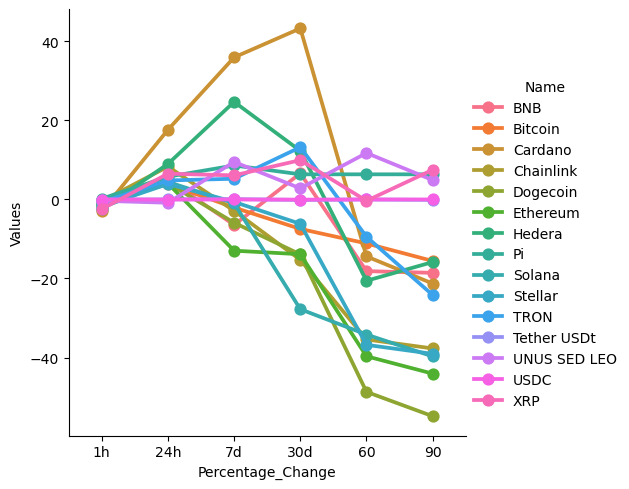

In [94]:
#Visualization of DataFrame df7
sns.catplot(x = 'Percentage_Change', y = 'Values',hue = 'Name',data = df7, kind = 'point')

In [141]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name =='Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,87033.10769,2025-03-05 09:45:59.138436


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

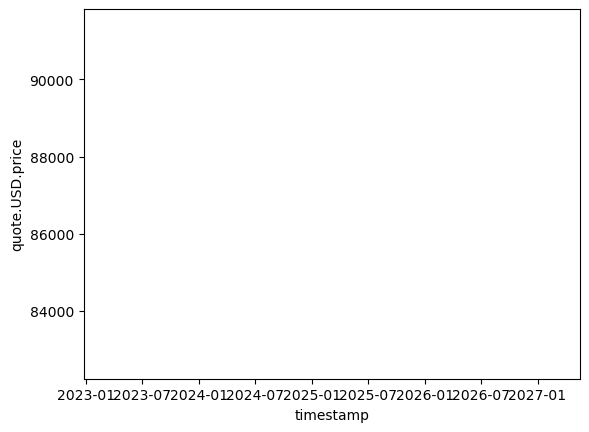

In [137]:
sns.lineplot(x= 'timestamp',y='quote.USD.price',data = df10)